<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import seaborn as sns


### 1. Import the data

In [2]:
seeds = pd.read_csv("./data/seeds.csv")

In [3]:
seeds.head(3)

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1

### 2. Do some EDA of relationships between features.

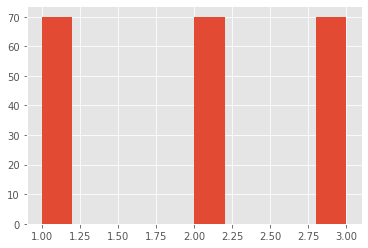

In [4]:
# Plot the Data to see the distributions/relationships
seeds['species'].hist();

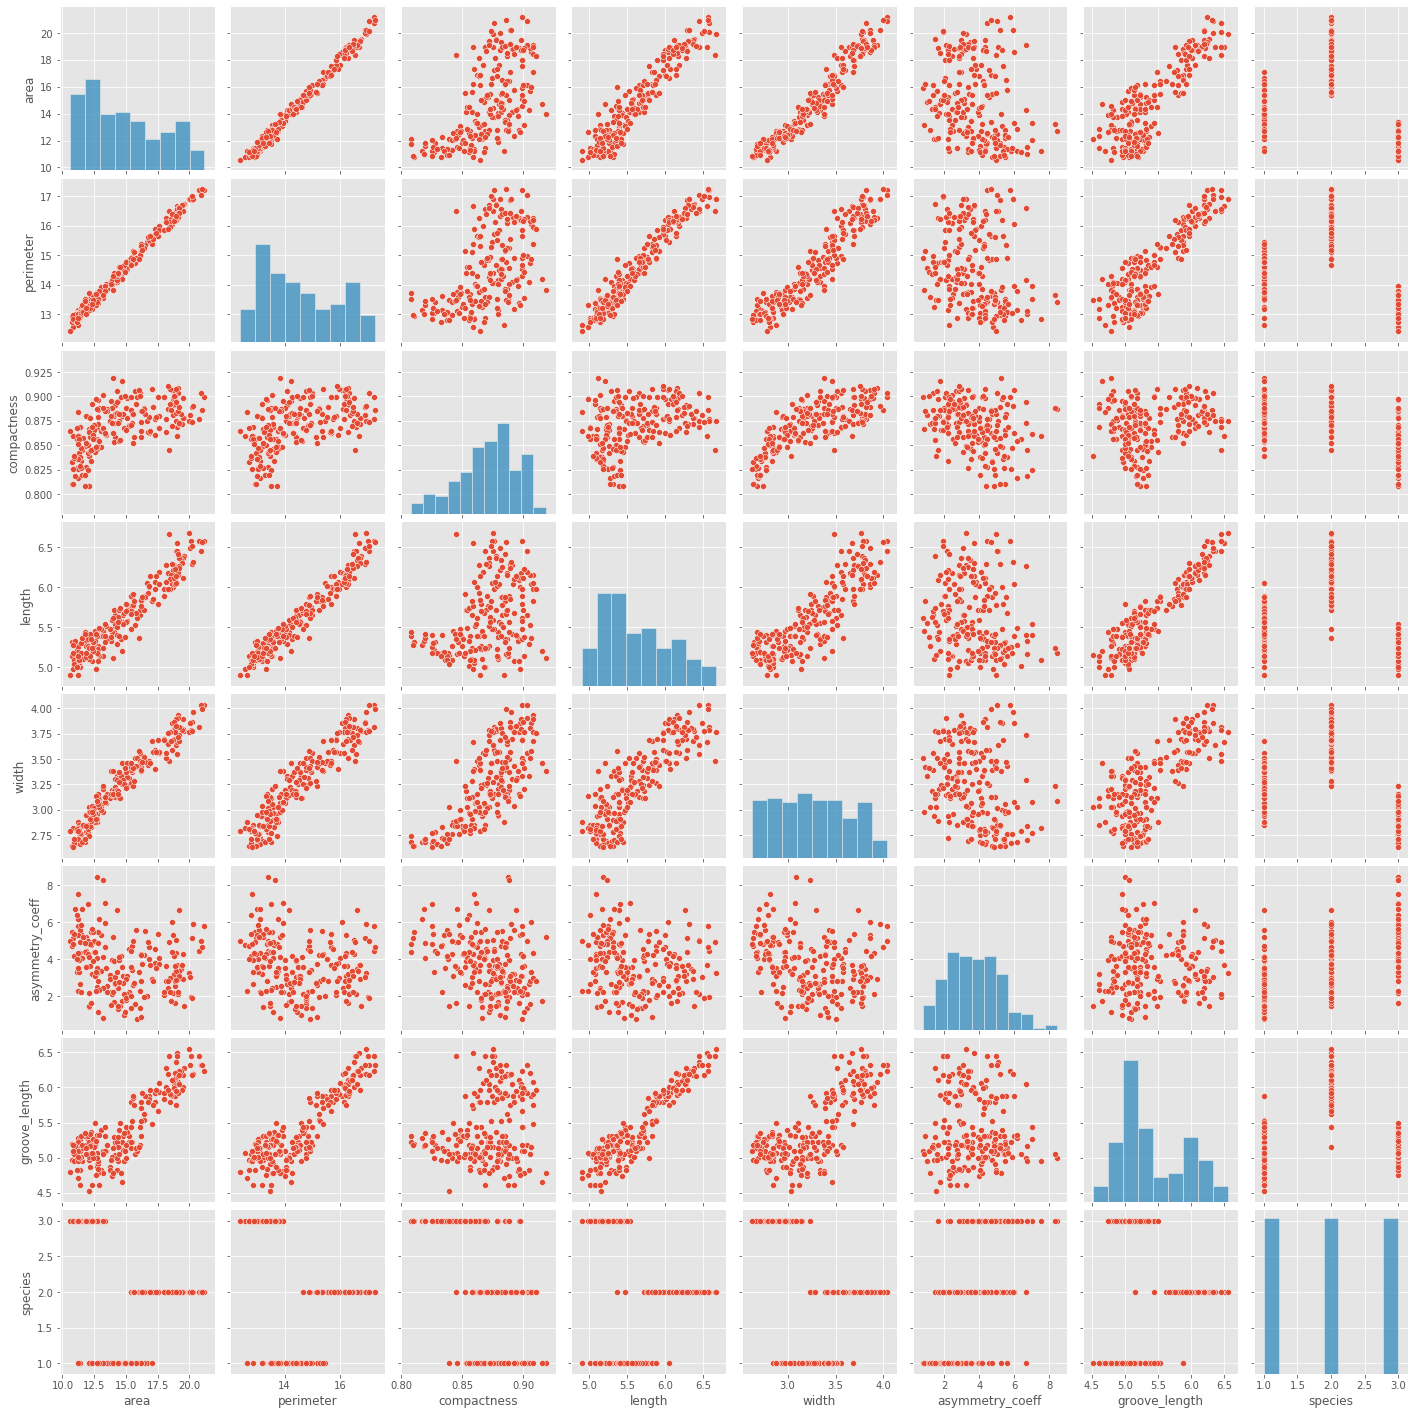

In [5]:
sns.pairplot(seeds);

In [6]:
# Check for nulls
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

In [7]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
seeds.loc[:,'species'] = seeds['species'].astype('object')

### no nulls

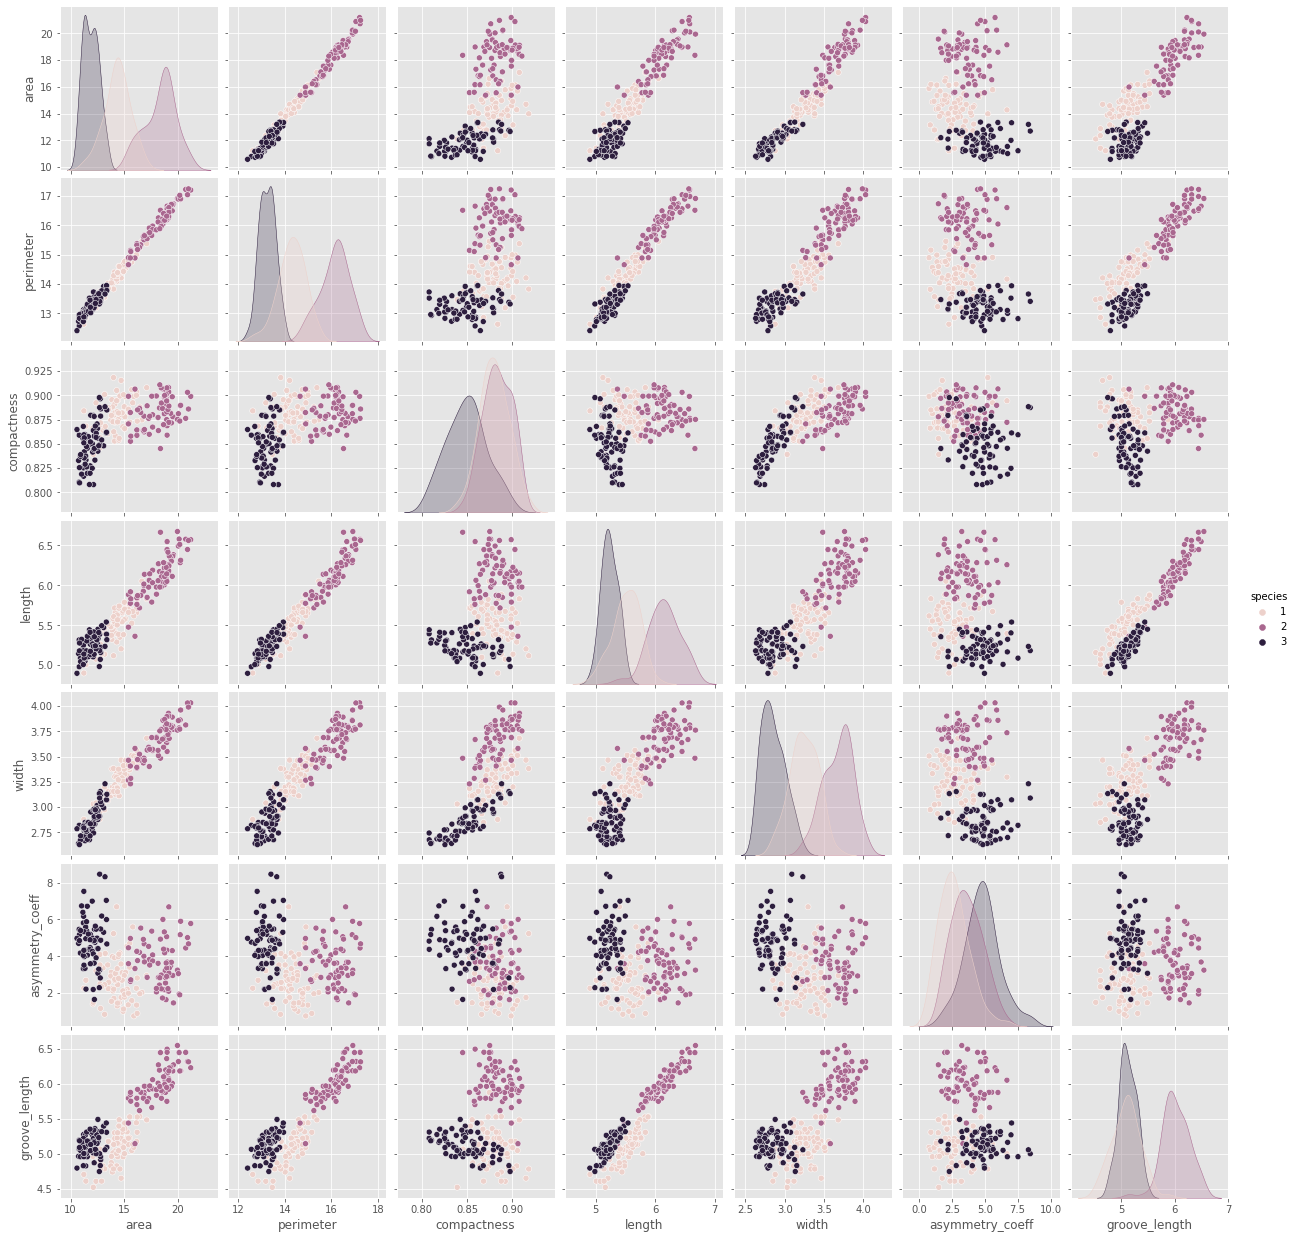

In [9]:
# Look at the real species labels.
sns.pairplot(seeds, hue='species');

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [10]:
new_seeds = seeds.drop(['species'], axis=1)

X = new_seeds

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [11]:
from sklearn.cluster import KMeans
km = KMeans()
km.fit(X)

KMeans()

### 5. Get the labels and centroids for out first clustering model.

In [12]:
print(km.labels_)
print(km.cluster_centers_)

[2 2 7 7 2 7 7 7 2 2 4 2 7 7 7 7 7 2 2 6 7 7 2 3 2 2 7 3 7 7 3 4 7 7 2 2 4
 4 7 0 7 7 3 4 7 2 2 7 7 2 7 4 7 7 2 2 7 2 2 3 3 3 3 7 3 3 2 7 2 3 4 4 4 1
 4 4 4 5 5 4 4 5 5 1 1 1 1 1 5 5 1 1 1 5 5 4 1 1 1 1 4 1 5 1 1 1 1 4 1 1 1
 1 1 5 5 1 5 1 1 1 5 1 4 1 4 5 5 1 1 4 1 1 4 4 4 4 4 2 2 4 0 0 0 0 6 0 3 6
 3 6 6 0 6 6 6 0 6 6 6 6 3 6 6 6 0 3 6 6 6 6 0 0 6 6 6 6 6 6 0 3 6 6 6 6 0
 6 6 6 0 6 6 6 6 6 6 6 0 7 3 3 0 3 6 0 6 6 6 0 6 0]
[[12.28       13.41631579  0.85591579  5.28047368  2.93836842  6.43410526
   5.14173684]
 [18.95454545 16.38878788  0.8868      6.24748485  3.74469697  2.72354545
   6.11945455]
 [15.24041667 14.74125     0.88095833  5.66408333  3.34025     1.7207125
   5.2675    ]
 [12.40421053 13.40736842  0.86688947  5.20978947  2.97063158  2.36032105
   4.92305263]
 [16.47269231 15.34346154  0.87895385  5.86096154  3.47657692  4.14265385
   5.68923077]
 [19.58333333 16.646       0.88772667  6.31586667  3.83506667  5.08153333
   6.1444    ]
 [11.64659091 13.15681818  0.84505455  5

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [13]:
from sklearn.metrics import silhouette_score

# A:
silhouette_score(X, km.labels_)

0.36095905010334334

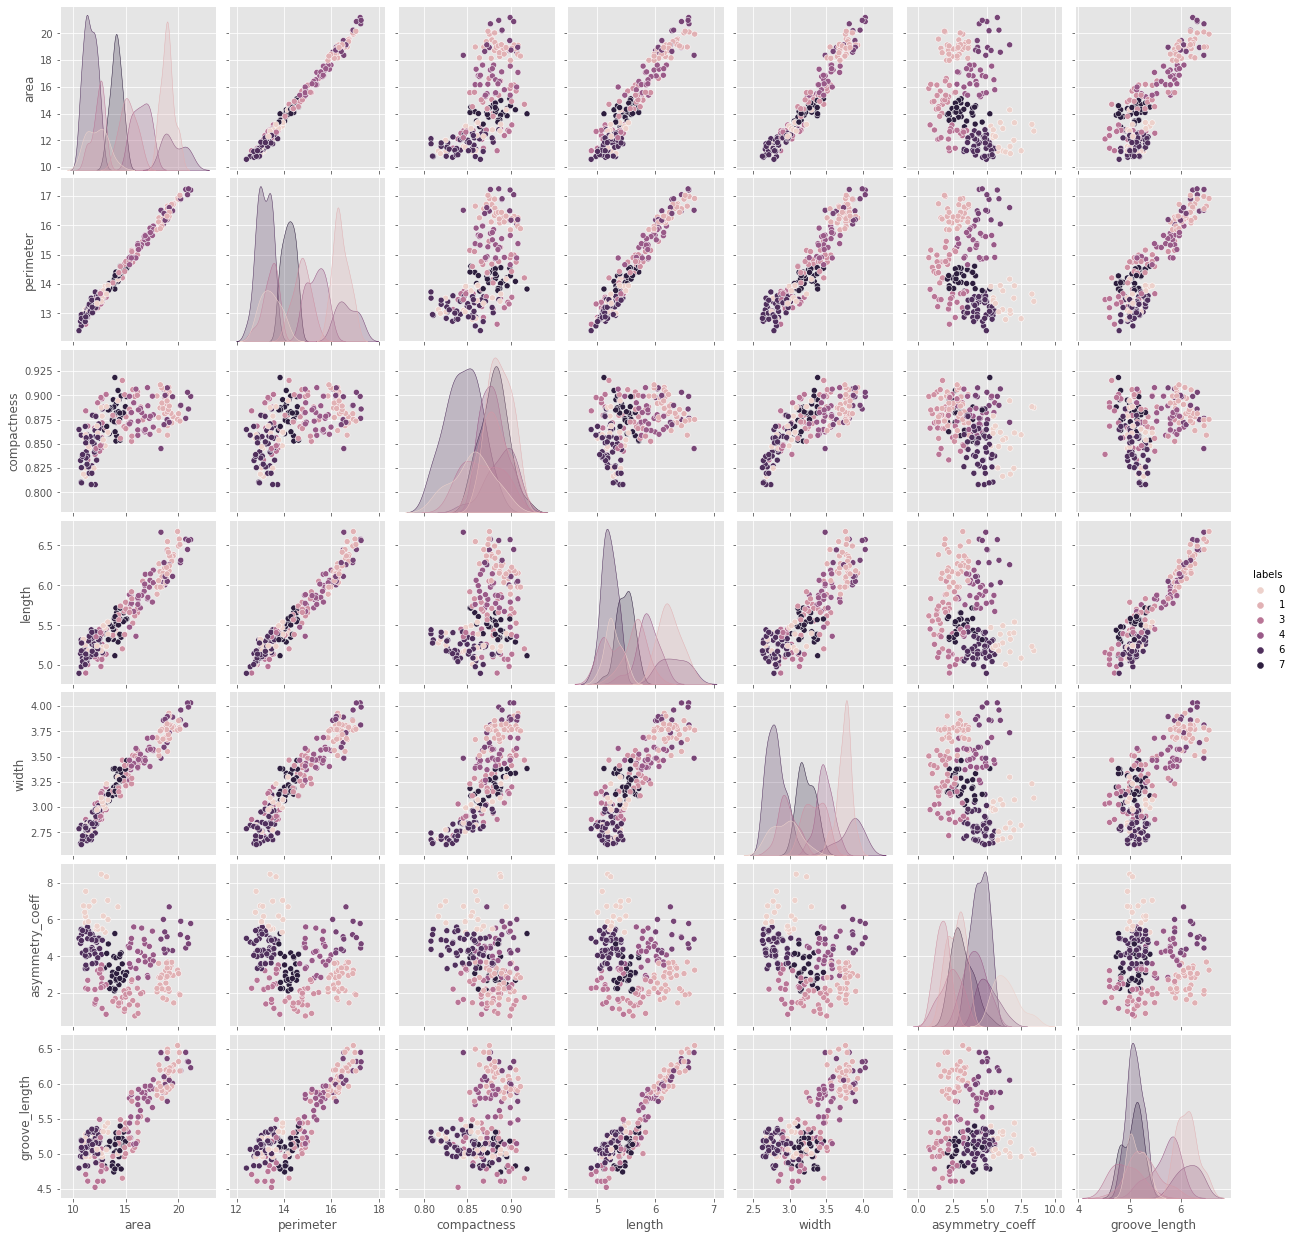

In [14]:
new_seeds_8 = pd.concat([new_seeds,pd.DataFrame(km.labels_,columns=['labels'])],axis=1)
sns.pairplot(data=new_seeds_8, hue='labels');

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [15]:
import random

np.random.seed(11)
random.randint(1,25), random.randint(1,25)

(9, 24)

### k=2

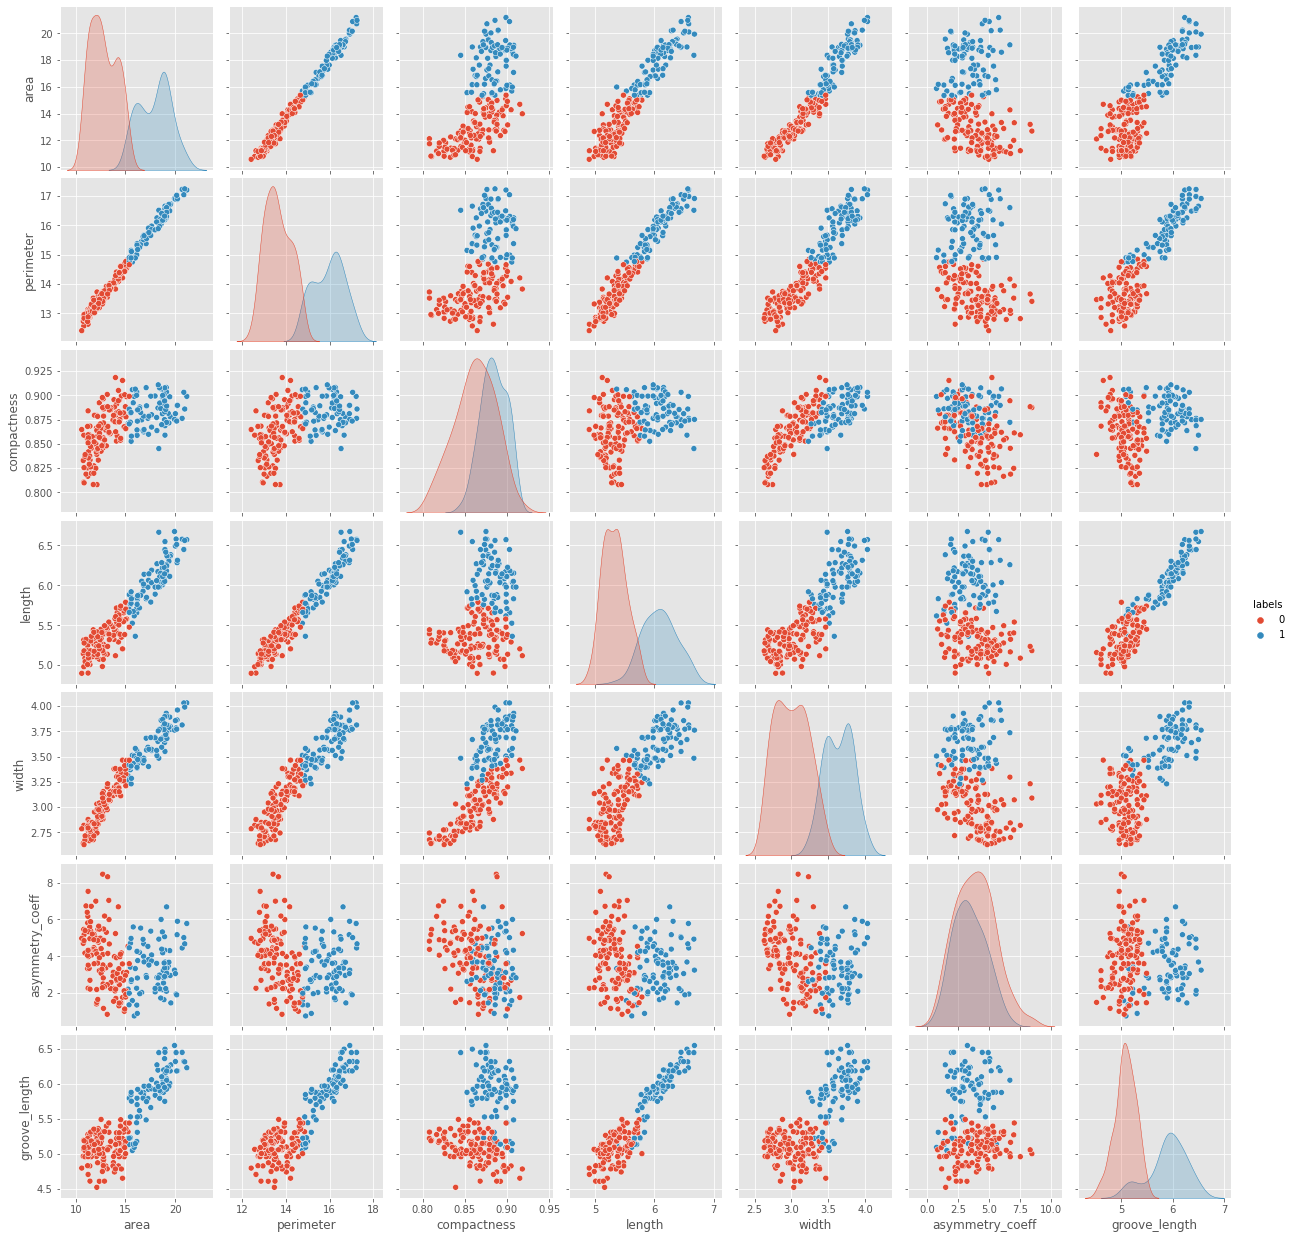

In [16]:
km2 = KMeans(2)
km2.fit(X)
new_seeds_2 = pd.concat([new_seeds,pd.DataFrame(km2.labels_,columns=['labels'])],axis=1)
sns.pairplot(data=new_seeds_2, hue='labels');

### k=7

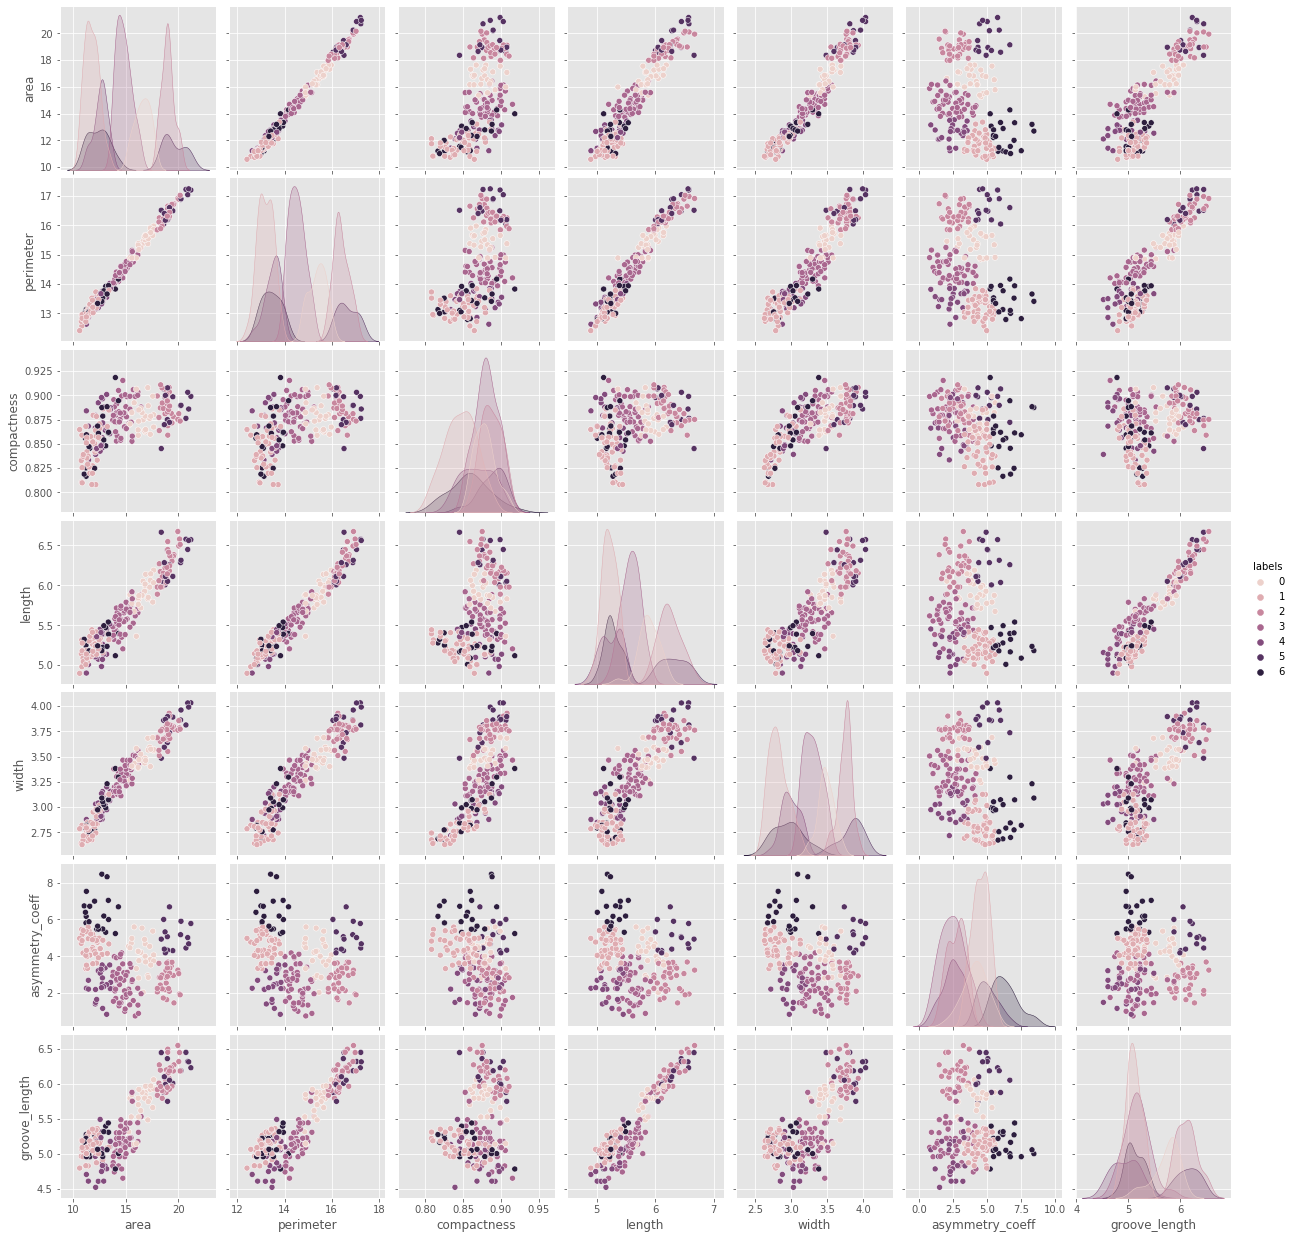

In [17]:
km7 = KMeans(7)
km7.fit(X)
new_seeds_7 = pd.concat([new_seeds,pd.DataFrame(km7.labels_,columns=['labels'])],axis=1)
sns.pairplot(data=new_seeds_7, hue='labels');

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [22]:
test_km  = KMeans(5)
test_km.fit(X)

test_km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 4, 4, 2, 1, 2, 2, 3, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       4, 4, 4, 2, 4, 2, 2, 4, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1], dtype=int32)

In [25]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

def find_optimal(max_k,the_X):

    best_score = 0
    
    # instantiate scale methods
    sc = StandardScaler()
    mm = MinMaxScaler()
    
    # using 3 methods to scale X 
    X_nm = normalize(the_X)
    X_sc = sc.fit_transform(the_X)
    X_mm = mm.fit_transform(the_X)
    methods = ['no_trans','normalize','StandardScaler','MinMaxScaler']
    
    for i in range(2,max_k+1):
        counter=0
        for trans_X in [X,X_nm,X_sc,X_mm]:
            km = KMeans(i)
            km.fit(trans_X)
            score = silhouette_score(trans_X, km.labels_)
            
            # if socore larger than best socre, assign the socore to best_score
            # also record the K and method
            if score > best_score:
                best_score = score
                k = i
                method = methods[counter]
            
            counter += 1
                
    
    return (best_score, k, method)
        

In [26]:
find_optimal(3,X)

(0.5182873410849096, 2, 'no_trans')

### So the best one is 2 cluster without and scale on X.

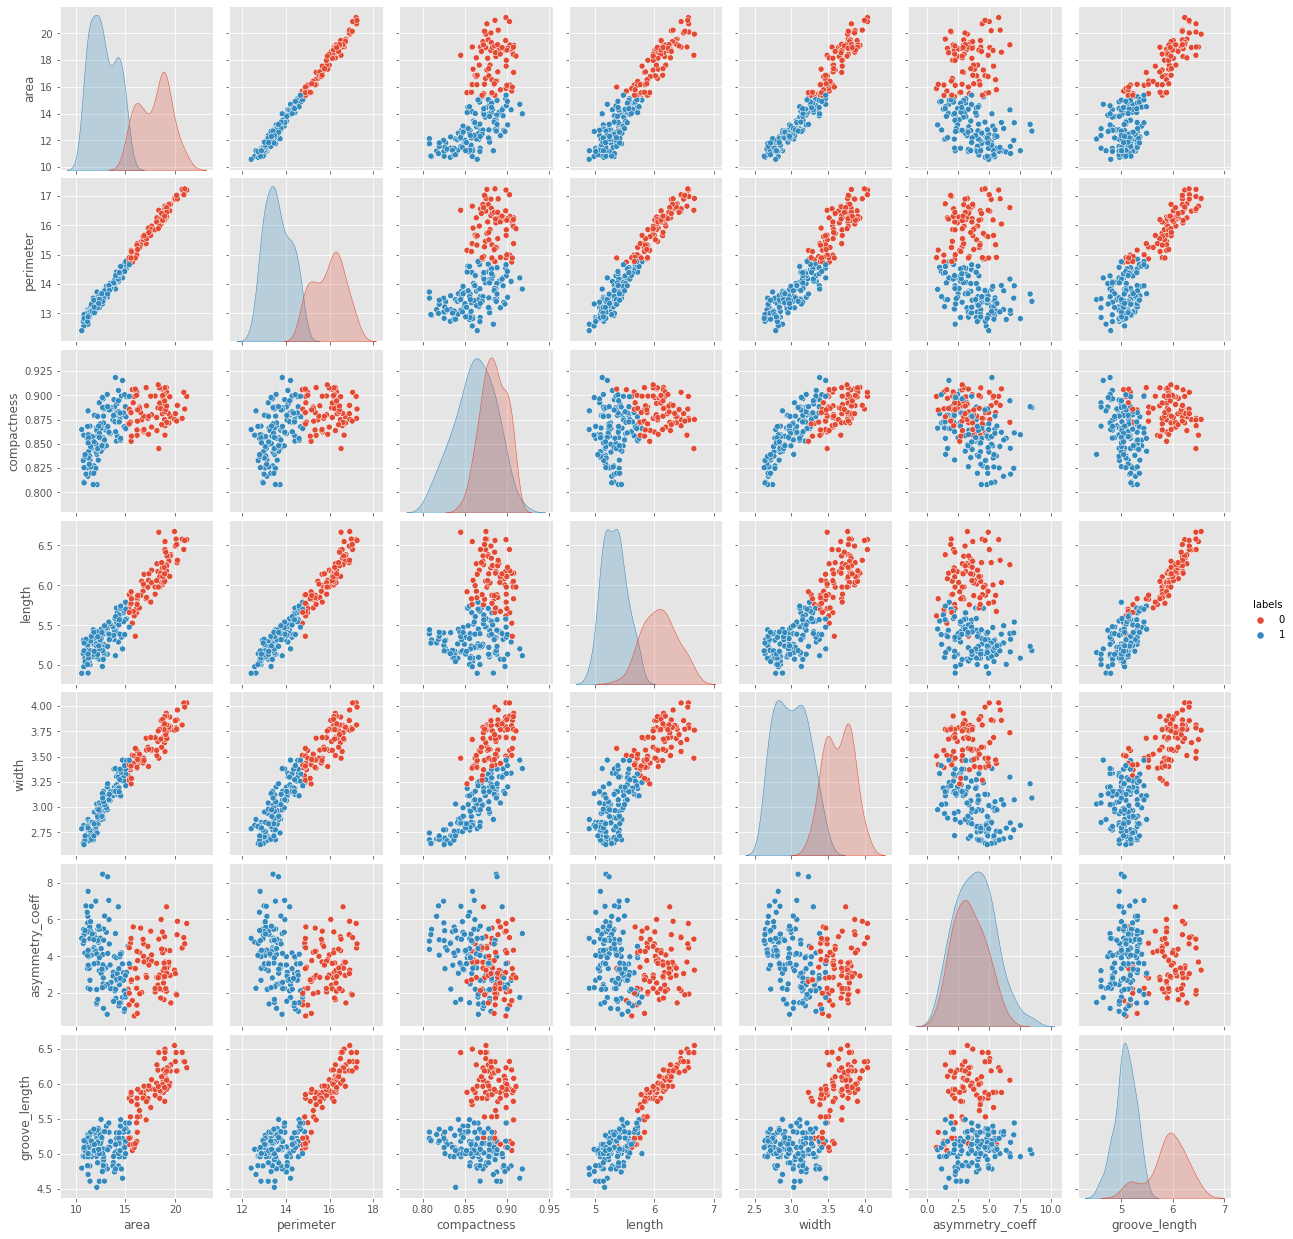

In [27]:
km2 = KMeans(2)
km2.fit(X)
new_seeds_2 = pd.concat([new_seeds,pd.DataFrame(km2.labels_,columns=['labels'])],axis=1)
sns.pairplot(data=new_seeds_2, hue='labels');

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [28]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [50]:
nhl = pd.read_csv('./data/nhl.csv')

In [51]:
nhl.head(3)

Team  PTS  Rank         TOI   GF  GA  GF60  GA60   GF%    SF  ...  \
0  Washington10  121     1  2001:52:00  115  73  3.45  2.19  61.2  1112  ...   
1   Vancouver11  117     1  2056:14:00   94  72  2.74  2.10  56.6  1143  ...   
2    San Jose10  113     1  1929:54:00   90  68  2.80  2.11  57.0  1065  ...   

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  

[3 rows x 28 columns]

In [52]:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [53]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
Team    90 non-null object
PTS     90 non-null int64
Rank    90 non-null int64
TOI     90 non-null object
GF      90 non-null int64
GA      90 non-null int64
GF60    90 non-null float64
GA60    90 non-null float64
GF%     90 non-null float64
SF      90 non-null int64
SA      90 non-null int64
SF60    90 non-null float64
SA60    90 non-null float64
SF%     90 non-null float64
FF      90 non-null int64
FA      90 non-null int64
FF60    90 non-null float64
FA60    90 non-null float64
FF%     90 non-null float64
CF      90 non-null int64
CA      90 non-null int64
CF60    90 non-null float64
CA60    90 non-null float64
CF%     90 non-null float64
Sh%     90 non-null float64
Sv%     90 non-null float64
PDO     90 non-null int64
PIM     90 non-null int64
dtypes: float64(14), int64(12), object(2)
memory usage: 19.8+ KB


In [54]:
nhl.select_dtypes('object')

Team         TOI
0   Washington10  2001:52:00
1    Vancouver11  2056:14:00
2     San Jose10  1929:54:00
3      Chicago10  2020:23:00
4    Vancouver12  2052:02:00
..           ...         ...
85     Florida11  2155:11:00
86    Columbus11  2034:54:00
87    Colorado12  2129:37:00
88    Edmonton10  1983:44:00
89    Edmonton11  1894:49:00

[90 rows x 2 columns]

### Team and TOI are objects
> We can use Team later to check the accuary of DBSCAN
> Convert TOI to numeric by sum up first 4 digits(hours) and add (5th,6th digits)/60 since they are minutes.

In [55]:
nhl.loc[:,'time'] = nhl.apply(lambda x: int(x['TOI'].split(':')[0]) + int(x['TOI'].split(':')[1])/60, axis=1)

In [56]:
nhl[['TOI','time']]

TOI         time
0   2001:52:00  2001.866667
1   2056:14:00  2056.233333
2   1929:54:00  1929.900000
3   2020:23:00  2020.383333
4   2052:02:00  2052.033333
..         ...          ...
85  2155:11:00  2155.183333
86  2034:54:00  2034.900000
87  2129:37:00  2129.616667
88  1983:44:00  1983.733333
89  1894:49:00  1894.816667

[90 rows x 2 columns]

### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [59]:
X = nhl.drop(['Team','TOI','Rank'],axis=1)
y = nhl['Rank']

In [69]:
X.head(3).T

0            1        2
PTS    121.000000   117.000000   113.00
GF     115.000000    94.000000    90.00
GA      73.000000    72.000000    68.00
GF60     3.450000     2.740000     2.80
GA60     2.190000     2.100000     2.11
GF%     61.200000    56.600000    57.00
SF    1112.000000  1143.000000  1065.00
SA    1047.000000  1053.000000  1039.00
SF60    33.300000    33.400000    33.10
SA60    31.400000    30.700000    32.30
SF%     51.500000    52.000000    50.60
FF    1526.000000  1602.000000  1493.00
FA    1449.000000  1414.000000  1442.00
FF60    45.700000    46.700000    46.40
FA60    43.400000    41.300000    44.80
FF%     51.300000    53.100000    50.90
CF    2138.000000  2144.000000  1985.00
CA    1935.000000  1870.000000  1876.00
CF60    64.100000    62.600000    61.70
CA60    58.000000    54.600000    58.30
CF%     52.500000    53.400000    51.40
Sh%     10.340000     8.220000     8.45
Sv%     93.030000    93.160000    93.46
PDO   1034.000000  1014.000000  1019.00
PIM   1269.000000   985.000000  1195.00
time  2001.866667  2056.233333  1929.90

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

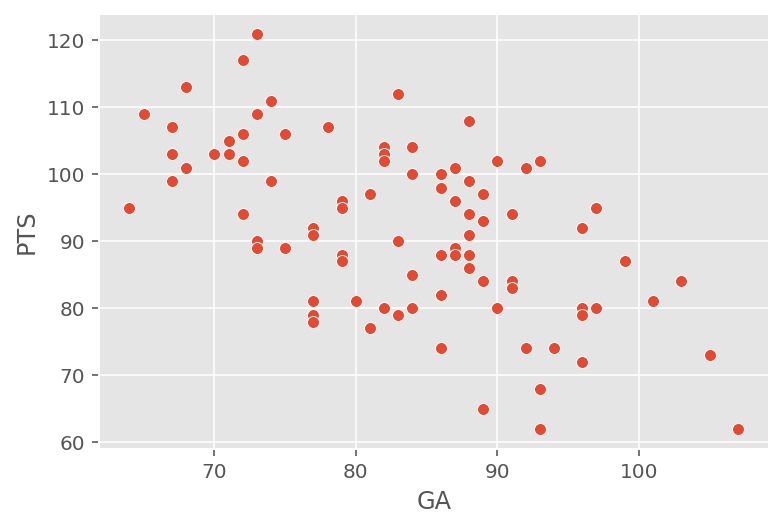

In [64]:
sns.scatterplot(x= nhl['GA'],y=nhl['time']);

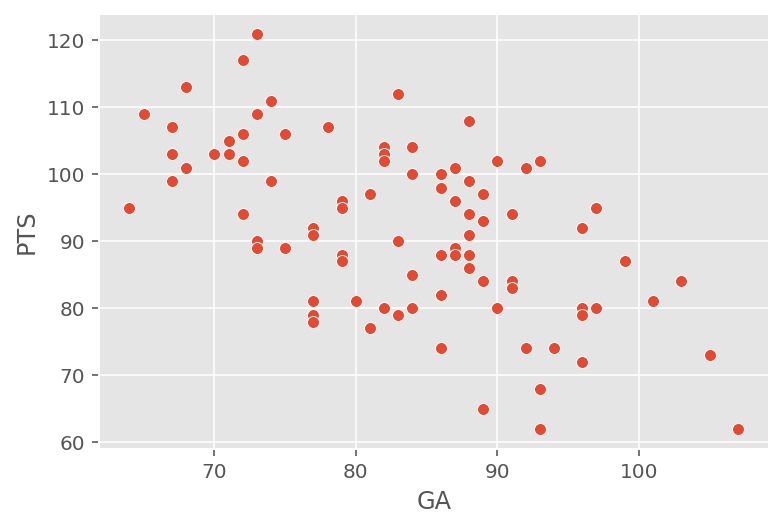

In [65]:
sns.scatterplot(x= nhl['GA'],y=nhl['PTS']);

### Didn't see much potential clusters.

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [78]:
sc = StandardScaler()

x_sc = sc.fit_transform(X)

x_sc_df = pd.DataFrame(x_sc,columns=X.columns)

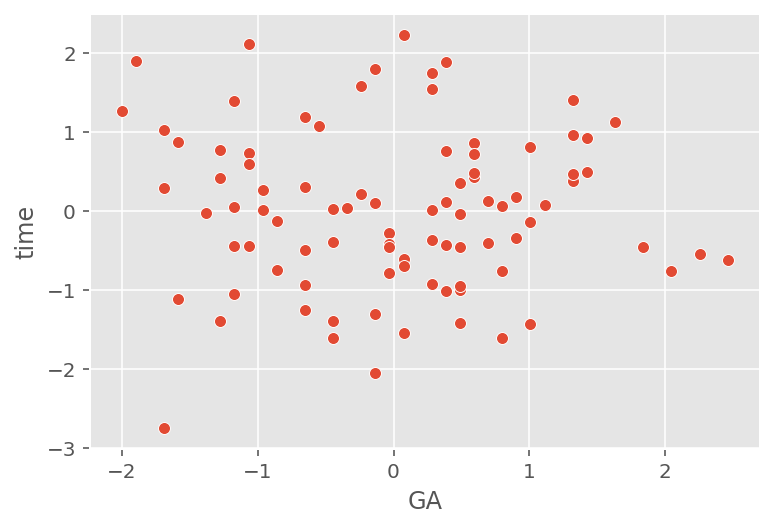

In [79]:
sns.scatterplot(x= x_sc_df['GA'],y=x_sc_df['time']);

### Didn't change too much, there might be a small cluster on the right of the plot(with only 4 points), however it's not very clear. 

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [118]:
# start with the default but return all labels as -1, so 
#db = DBSCAN(eps=0.5,min_samples=5)

#same
#db = DBSCAN(eps=2,min_samples=5)

db = DBSCAN(eps=3, min_samples=5)
db.fit(x_sc)

DBSCAN(eps=3)

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [119]:
db.labels_
# still got a lot of -1s

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,
       -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1])

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [141]:
# using a loop to find best params

eps_choice = np.linspace(1,5,5)
min_samples_eps_choice = np.linspace(2,5,4)

best_sil_score = 0
best_eps = 0
best_min_samples = 0

for eps in eps_choice:
    for min_samples in min_samples_eps_choice:
        db = DBSCAN(eps = eps, min_samples = min_samples)
        db.fit(x_sc)
        try:
            score = silhouette_score(x_sc,db.labels_)
            if score > best_sil_score:
                best_sil_score = score
                best_eps = eps
                best_min_samples = min_samples
            else:
                pass
        except:
            pass

In [142]:
print(best_sil_score, best_eps, best_min_samples)

0.23165675838427843 4.0 3.0


In [143]:
db_final = DBSCAN(eps=4,min_samples=3)

In [144]:
db_final.fit(x_sc)

DBSCAN(eps=4, min_samples=3)

**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`**

In [145]:
from sklearn.metrics import homogeneity_completeness_v_measure

In [146]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y, db_final.labels_)

In [147]:
print(homogeneity, completeness, v_measure)

0.030285441131345747 0.1357969021673107 0.04952566305030543


### 8. Plot the clusters

You can choose any two variables for the axes.

In [148]:
db_final.labels_

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

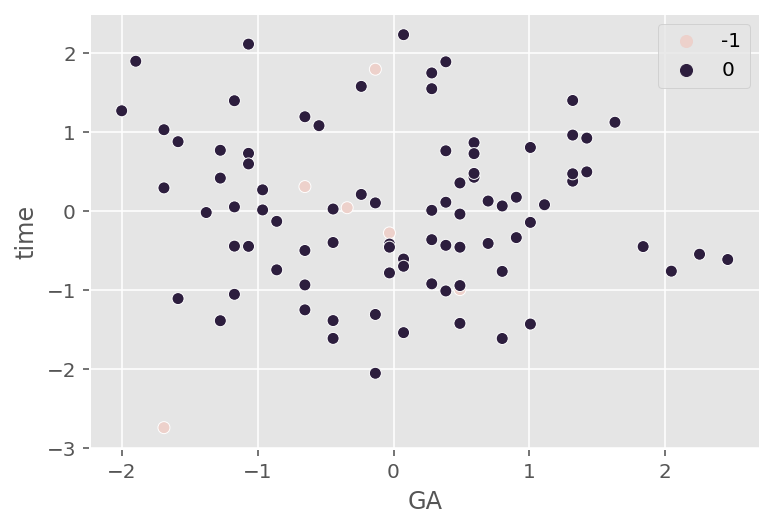

In [149]:
sns.scatterplot(x= x_sc_df['GA'],y=x_sc_df['time'], hue=db_final.labels_);

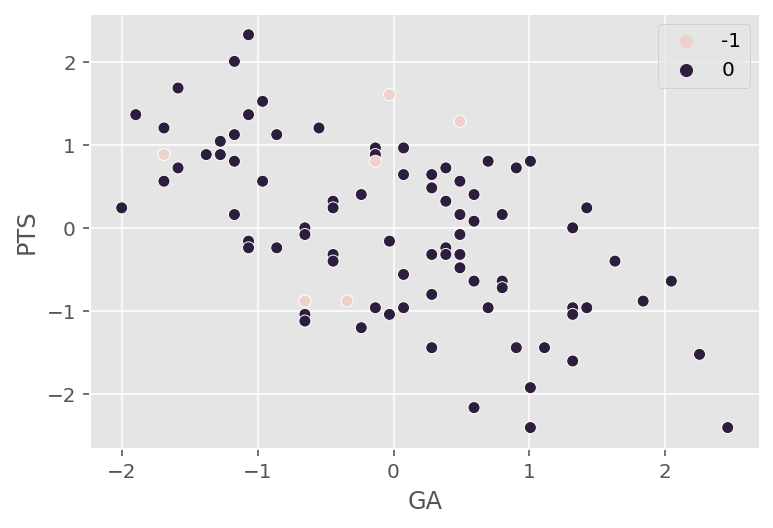

In [150]:
sns.scatterplot(x= x_sc_df['GA'],y=x_sc_df['PTS'], hue=db_final.labels_ );

### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

In [154]:
from sklearn.datasets import make_circles

In [155]:
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

In [157]:
circles_X

array([[-0.08769568,  1.08597835],
       [-0.83755821,  0.54731034],
       [ 0.79684284,  0.41149548],
       ...,
       [ 0.28197613, -0.99058106],
       [-0.13945495, -0.99992483],
       [-0.06902609,  0.09488232]])

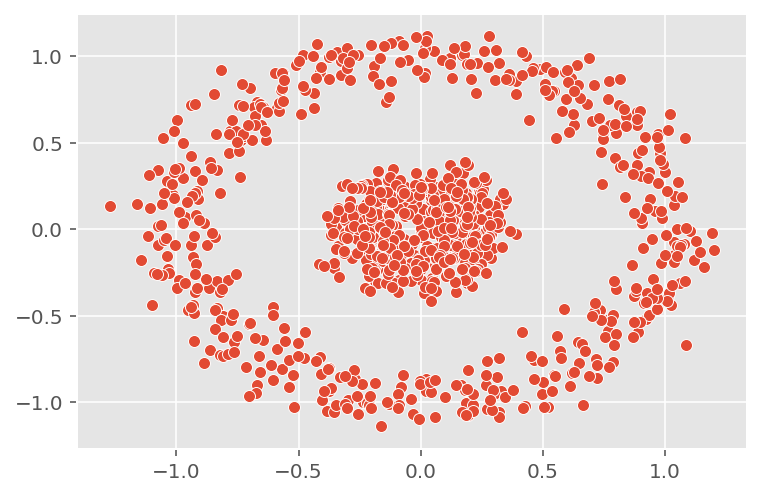

In [160]:
sns.scatterplot(x=circles_X[:,0], y=circles_X[:,1]);

**9.2 Scale the data and fit DBSCAN on it.**

In [161]:
circles_X_sc = sc.fit_transform(circles_X)

In [169]:
# using a loop to find best params

eps_choice = np.linspace(0.1,3,10)
min_samples_eps_choice = np.linspace(2,5,4)

best_sil_score = 0
best_eps = 0
best_min_samples = 0

for eps in eps_choice:
    for min_samples in min_samples_eps_choice:
        db = DBSCAN(eps = eps, min_samples = min_samples)
        db.fit(circles_X_sc)
        try:
            score = silhouette_score(circles_X_sc,db.labels_)
            if score > best_sil_score:
                best_sil_score = score
                best_eps = eps
                best_min_samples = min_samples
            else:
                pass
        except:
            pass

In [170]:
print(best_sil_score, best_eps, best_min_samples)

0.23783520183694895 0.42222222222222217 2.0


In [171]:
db_easy = DBSCAN(eps=0.422, min_samples=2)
db_easy.fit(circles_X_sc)

DBSCAN(eps=0.422, min_samples=2)

**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

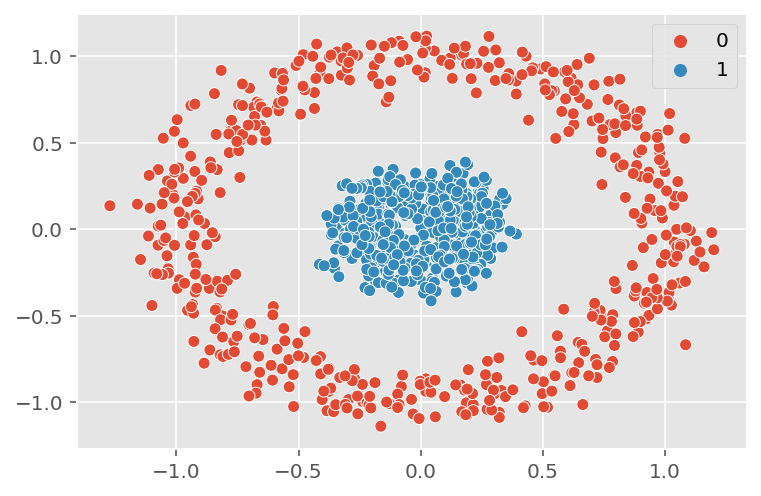

In [174]:
sns.scatterplot(x=circles_X[:,0], y=circles_X[:,1], hue = db_easy.labels_);

In [178]:
# check if any points are labeled as abnormal
sum(db_easy.labels_ == -1)

0

In [179]:
homogeneity_1, completeness_1, v_measure_1 = homogeneity_completeness_v_measure(circles_y, db_easy.labels_)

In [180]:
print(homogeneity_1, completeness_1, v_measure_1)

1.0 1.0 1.0
